In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pip install pandas==1.5.3

In [3]:
pip install basketball_reference_scraper

Note: you may need to restart the kernel to use updated packages.


In [4]:
from basketball_reference_scraper.shot_charts import get_shot_chart

In [5]:
# use this code to get the shot selection of the spurs in the spurs vs mavs game on october 25th 2023
d = get_shot_chart('2023-10-25', 'SAS', 'DAL')
sas = d['SAS']
sas

C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

,x,y,QUARTER,TIME_REMAINING,PLAYER,MAKE_MISS,VALUE,DISTANCE
0,18.2 ft,3.68 ft,1,11:45.0,Jeremy Sochan,MISS,2,6 ft
1,23.7 ft,3.38 ft,1,11:40.0,Jeremy Sochan,MAKE,2,1 ft
2,3.2 ft,21.2 ft,1,11:18.0,Devin Vassell,MISS,3,28 ft
3,32.6 ft,7.46 ft,1,10:49.0,Zach Collins,MAKE,2,10 ft
4,21.8 ft,29.2 ft,1,10:33.0,Victor Wembanyama,MISS,3,27 ft
...,...,...,...,...,...,...,...,...
84,12.3 ft,4.48 ft,4,3:55.0,Victor Wembanyama,MAKE,2,12 ft
85,25.2 ft,17.4 ft,4,2:49.0,Victor Wembanyama,MISS,2,15 ft
86,22.1 ft,3.08 ft,4,1:31.0,Keldon Johnson,MISS,2,2 ft
87,24.0 ft,3.08 ft,4,1:26.0,Keldon Johnson,MISS,2,0 ft


In [6]:
# Subset to only Wemanyama shots and clean the strings in the coordinates to get rid of ft, and make it a numeric value
victor = sas[sas['PLAYER'] == 'Victor Wembanyama']
victor['x'] = victor['x'].str.replace(' ft', '')
victor['x'] = pd.to_numeric(victor['x'], errors='coerce')
victor['y'] = victor['y'].str.replace(' ft', '')
victor['y'] = pd.to_numeric(victor['y'], errors='coerce')
victor

C:\Users\zecha\AppData\Local\Temp\ipykernel_41884\947599872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victor['x'] = victor['x'].str.replace(' ft', '')
C:\Users\zecha\AppData\Local\Temp\ipykernel_41884\947599872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victor['x'] = pd.to_numeric(victor['x'], errors='coerce')
C:\Users\zecha\AppData\Local\Temp\ipykernel_41884\947599872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,x,y,QUARTER,TIME_REMAINING,PLAYER,MAKE_MISS,VALUE,DISTANCE
4,21.8,29.20,1,10:33.0,Victor Wembanyama,MISS,3,27 ft
7,16.2,26.80,1,8:24.0,Victor Wembanyama,MAKE,3,25 ft
19,45.8,14.10,1,1:51.0,Victor Wembanyama,MAKE,3,25 ft
32,15.5,27.20,2,7:26.0,Victor Wembanyama,MISS,3,26 ft
78,24.0,3.38,4,6:53.0,Victor Wembanyama,MAKE,2,0 ft
80,39.8,22.50,4,6:03.0,Victor Wembanyama,MAKE,3,25 ft
82,24.0,3.68,4,4:56.0,Victor Wembanyama,MAKE,2,1 ft
84,12.3,4.48,4,3:55.0,Victor Wembanyama,MAKE,2,12 ft
85,25.2,17.40,4,2:49.0,Victor Wembanyama,MISS,2,15 ft


In [7]:
# Adjust the x,y values to fit properly on basketball court
victor['x'] = 10 * (victor.x - 25)
victor['y'] = 9.2 * victor.y
victor

C:\Users\zecha\AppData\Local\Temp\ipykernel_41884\3044541686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victor['x'] = 10 * (victor.x - 25)
C:\Users\zecha\AppData\Local\Temp\ipykernel_41884\3044541686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victor['y'] = 9.2 * victor.y


,x,y,QUARTER,TIME_REMAINING,PLAYER,MAKE_MISS,VALUE,DISTANCE
4,-32.0,268.640,1,10:33.0,Victor Wembanyama,MISS,3,27 ft
7,-88.0,246.560,1,8:24.0,Victor Wembanyama,MAKE,3,25 ft
19,208.0,129.720,1,1:51.0,Victor Wembanyama,MAKE,3,25 ft
32,-95.0,250.240,2,7:26.0,Victor Wembanyama,MISS,3,26 ft
78,-10.0,31.096,4,6:53.0,Victor Wembanyama,MAKE,2,0 ft
80,148.0,207.000,4,6:03.0,Victor Wembanyama,MAKE,3,25 ft
82,-10.0,33.856,4,4:56.0,Victor Wembanyama,MAKE,2,1 ft
84,-127.0,41.216,4,3:55.0,Victor Wembanyama,MAKE,2,12 ft
85,2.0,160.080,4,2:49.0,Victor Wembanyama,MISS,2,15 ft


In [8]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

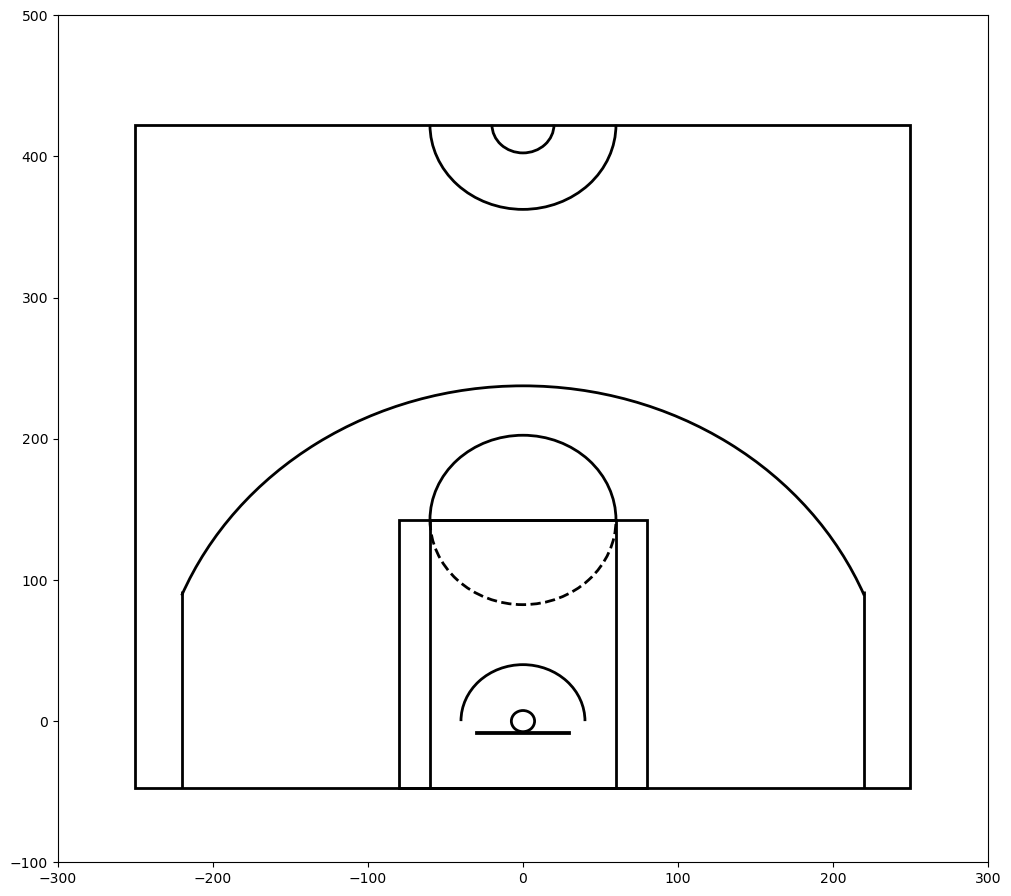

In [9]:
# Code to make basketball court
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

In [10]:
# Make two different data frames of Wembanyamas made and missed shots
made_shots = victor[victor['MAKE_MISS'] == 'MAKE']
missed_shots = victor[victor['MAKE_MISS'] == 'MISS']

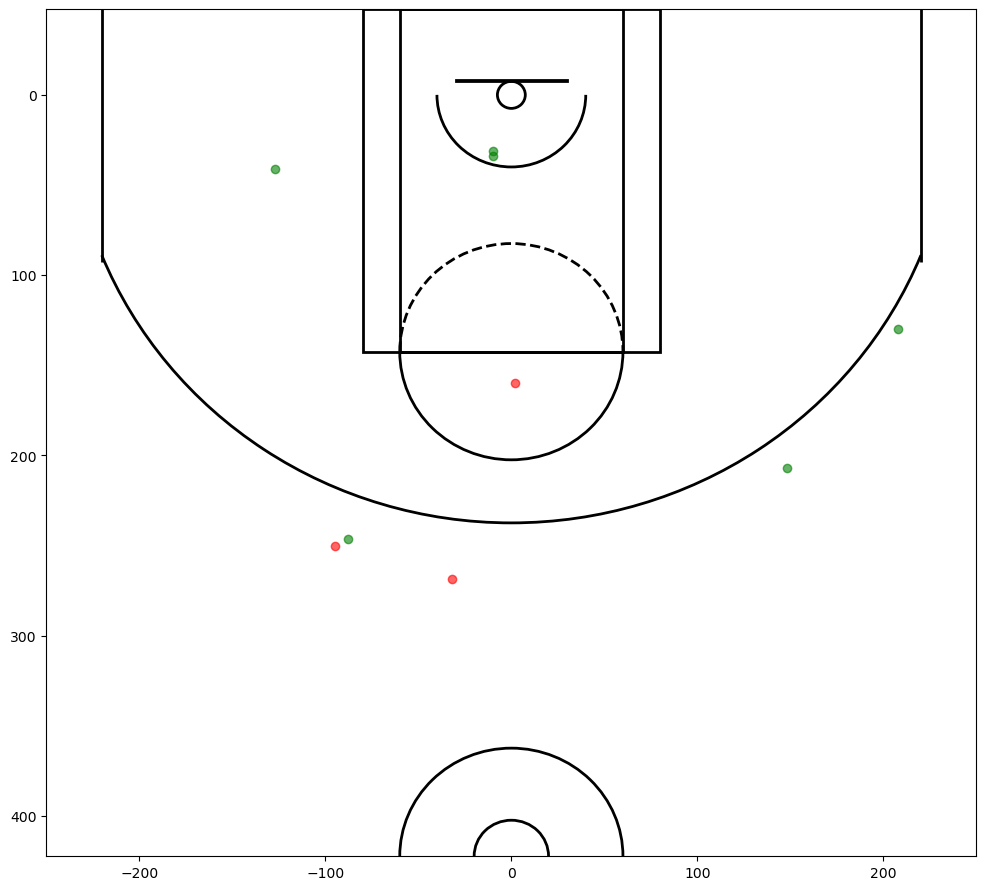

In [11]:
# plot his shots, green = made and red = missed
plt.figure(figsize=(12,11))
#plt.scatter(victor.x, victor.y)
plt.scatter(made_shots['x'], made_shots['y'], color='green', label='Made Shot', alpha=0.6)
plt.scatter(missed_shots['x'], missed_shots['y'], color='red', label='Missed Shot', alpha=0.6)
draw_court()
# Descending values along the axis from left to right
plt.xlim(-250,250)
plt.ylim(422.5,-47.5)
plt.show()